<a href="https://colab.research.google.com/github/YaniaNada/Cafeteria_Analysis_OptiMeal_Project/blob/main/exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
menu = pd.read_csv("/content/drive/Othercomputers/My PC/GitHub/Cafeteria_Analysis_OptiMeal_Project/Restaurant_Orders/menu_items.csv")
print(menu.head())

order_details = pd.read_csv("/content/drive/Othercomputers/My PC/GitHub/Cafeteria_Analysis_OptiMeal_Project/Restaurant_Orders/order_details.csv")
print(order_details.head())

   menu_item_id      item_name  category  price
0           101      Hamburger  American  12.95
1           102   Cheeseburger  American  13.95
2           103        Hot Dog  American   9.00
3           104  Veggie Burger  American  10.50
4           105   Mac & Cheese  American   7.00
   order_details_id  order_id order_date   order_time  item_id
0                 1         1     1/1/23  11:38:36 AM    109.0
1                 2         2     1/1/23  11:57:40 AM    108.0
2                 3         2     1/1/23  11:57:40 AM    124.0
3                 4         2     1/1/23  11:57:40 AM    117.0
4                 5         2     1/1/23  11:57:40 AM    129.0


In [4]:
print(menu.info())
print(order_details.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   menu_item_id  32 non-null     int64  
 1   item_name     32 non-null     object 
 2   category      32 non-null     object 
 3   price         32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12234 entries, 0 to 12233
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  12234 non-null  int64  
 1   order_id          12234 non-null  int64  
 2   order_date        12234 non-null  object 
 3   order_time        12234 non-null  object 
 4   item_id           12097 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 478.0+ KB
None


In [5]:
print(menu.isnull().sum())
print(order_details.isnull().sum())

menu_item_id    0
item_name       0
category        0
price           0
dtype: int64
order_details_id      0
order_id              0
order_date            0
order_time            0
item_id             137
dtype: int64


In [6]:
menu["item_id"] = menu["menu_item_id"]
menu.head()

,menu_item_id,item_name,category,price,item_id
0,101,Hamburger,American,12.95,101
1,102,Cheeseburger,American,13.95,102
2,103,Hot Dog,American,9.00,103
3,104,Veggie Burger,American,10.50,104
4,105,Mac & Cheese,American,7.00,105


In [7]:
merged_df = pd.merge(order_details, menu, on="item_id", how="left")
merged_df.drop(columns= 'menu_item_id', inplace=True)
merged_df.head()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price
0,1,1,1/1/23,11:38:36 AM,109.0,Korean Beef Bowl,Asian,17.95
1,2,2,1/1/23,11:57:40 AM,108.0,Tofu Pad Thai,Asian,14.50
2,3,2,1/1/23,11:57:40 AM,124.0,Spaghetti,Italian,14.50
3,4,2,1/1/23,11:57:40 AM,117.0,Chicken Burrito,Mexican,12.95
4,5,2,1/1/23,11:57:40 AM,129.0,Mushroom Ravioli,Italian,15.50


In [8]:
'''empty_orders = merged_df[merged_df["item_id"].isnull()]
merged_df.dropna(inplace=True)
merged_df.isnull().sum()'''

'empty_orders = merged_df[merged_df["item_id"].isnull()]\nmerged_df.dropna(inplace=True)\nmerged_df.isnull().sum()'

In [9]:
'''empty_orders.info()'''

'empty_orders.info()'

In [10]:
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], format = 'mixed')
print(f' date data type: ',{type(merged_df["order_date"][1])})
merged_df['order_time'] = pd.to_datetime(merged_df['order_time'], format = 'mixed').dt.time
print(f' time data type: ',{type(merged_df["order_time"][1])})

 date data type:  {<class 'pandas._libs.tslibs.timestamps.Timestamp'>}
 time data type:  {<class 'datetime.time'>}


In [11]:
merged_df['order_datetime'] = pd.to_datetime(merged_df['order_date'].astype(str) + ' ' + merged_df['order_time'].astype(str))
merged_df.head()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,order_datetime
0,1,1,2023-01-01,11:38:36,109.0,Korean Beef Bowl,Asian,17.95,2023-01-01 11:38:36
1,2,2,2023-01-01,11:57:40,108.0,Tofu Pad Thai,Asian,14.50,2023-01-01 11:57:40
2,3,2,2023-01-01,11:57:40,124.0,Spaghetti,Italian,14.50,2023-01-01 11:57:40
3,4,2,2023-01-01,11:57:40,117.0,Chicken Burrito,Mexican,12.95,2023-01-01 11:57:40
4,5,2,2023-01-01,11:57:40,129.0,Mushroom Ravioli,Italian,15.50,2023-01-01 11:57:40


In [12]:
merged_df['order_per_minute'] = merged_df['order_datetime'].dt.floor('min')
orders_per_minute = merged_df.groupby('order_per_minute').size().reset_index(name='count')
merged_df.head()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,order_datetime,order_per_minute
0,1,1,2023-01-01,11:38:36,109.0,Korean Beef Bowl,Asian,17.95,2023-01-01 11:38:36,2023-01-01 11:38:00
1,2,2,2023-01-01,11:57:40,108.0,Tofu Pad Thai,Asian,14.50,2023-01-01 11:57:40,2023-01-01 11:57:00
2,3,2,2023-01-01,11:57:40,124.0,Spaghetti,Italian,14.50,2023-01-01 11:57:40,2023-01-01 11:57:00
3,4,2,2023-01-01,11:57:40,117.0,Chicken Burrito,Mexican,12.95,2023-01-01 11:57:40,2023-01-01 11:57:00
4,5,2,2023-01-01,11:57:40,129.0,Mushroom Ravioli,Italian,15.50,2023-01-01 11:57:40,2023-01-01 11:57:00


In [13]:
merged_df['order_per_hour'] = merged_df['order_datetime'].dt.floor('h')
orders_per_hour = merged_df.groupby('order_per_hour').size().reset_index(name='count')
merged_df.head()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,order_datetime,order_per_minute,order_per_hour
0,1,1,2023-01-01,11:38:36,109.0,Korean Beef Bowl,Asian,17.95,2023-01-01 11:38:36,2023-01-01 11:38:00,2023-01-01 11:00:00
1,2,2,2023-01-01,11:57:40,108.0,Tofu Pad Thai,Asian,14.50,2023-01-01 11:57:40,2023-01-01 11:57:00,2023-01-01 11:00:00
2,3,2,2023-01-01,11:57:40,124.0,Spaghetti,Italian,14.50,2023-01-01 11:57:40,2023-01-01 11:57:00,2023-01-01 11:00:00
3,4,2,2023-01-01,11:57:40,117.0,Chicken Burrito,Mexican,12.95,2023-01-01 11:57:40,2023-01-01 11:57:00,2023-01-01 11:00:00
4,5,2,2023-01-01,11:57:40,129.0,Mushroom Ravioli,Italian,15.50,2023-01-01 11:57:40,2023-01-01 11:57:00,2023-01-01 11:00:00


In [14]:
merged_df['weekday'] = merged_df['order_datetime'].dt.day_name()
merged_df.head()


,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,order_datetime,order_per_minute,order_per_hour,weekday
0,1,1,2023-01-01,11:38:36,109.0,Korean Beef Bowl,Asian,17.95,2023-01-01 11:38:36,2023-01-01 11:38:00,2023-01-01 11:00:00,Sunday
1,2,2,2023-01-01,11:57:40,108.0,Tofu Pad Thai,Asian,14.50,2023-01-01 11:57:40,2023-01-01 11:57:00,2023-01-01 11:00:00,Sunday
2,3,2,2023-01-01,11:57:40,124.0,Spaghetti,Italian,14.50,2023-01-01 11:57:40,2023-01-01 11:57:00,2023-01-01 11:00:00,Sunday
3,4,2,2023-01-01,11:57:40,117.0,Chicken Burrito,Mexican,12.95,2023-01-01 11:57:40,2023-01-01 11:57:00,2023-01-01 11:00:00,Sunday
4,5,2,2023-01-01,11:57:40,129.0,Mushroom Ravioli,Italian,15.50,2023-01-01 11:57:40,2023-01-01 11:57:00,2023-01-01 11:00:00,Sunday


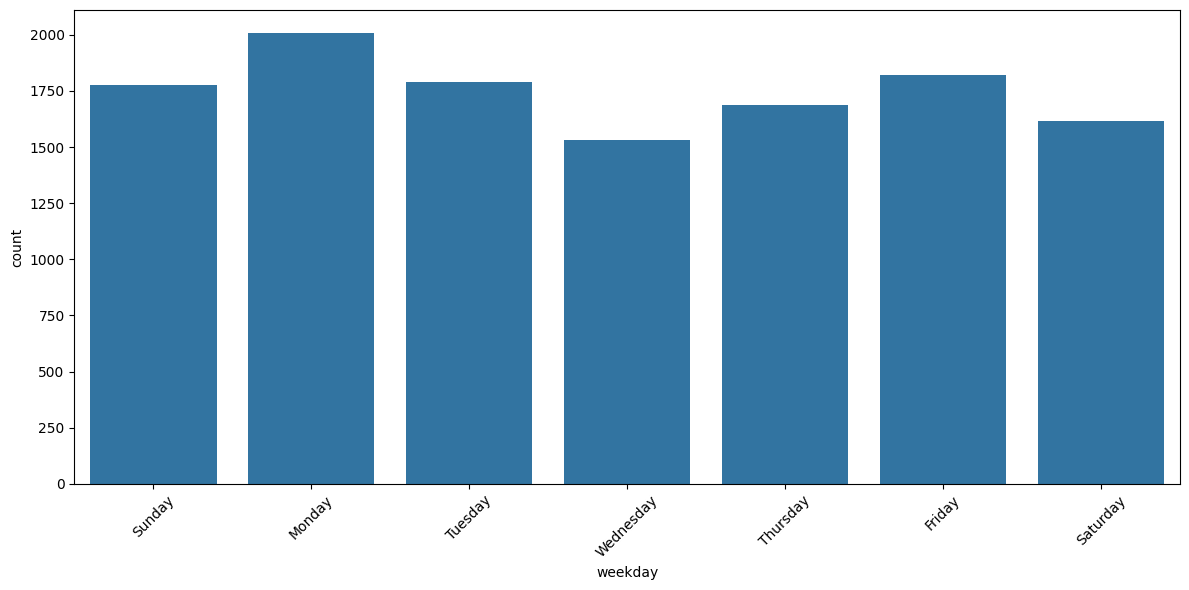

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
merged_df['hour'] = merged_df['order_per_hour'].dt.hour
merged_df['minutes'] = merged_df['order_per_minute'].dt.minute
merged_df.head()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,order_datetime,order_per_minute,order_per_hour,weekday,hour,minutes
0,1,1,2023-01-01,11:38:36,109.0,Korean Beef Bowl,Asian,17.95,2023-01-01 11:38:36,2023-01-01 11:38:00,2023-01-01 11:00:00,Sunday,11,38
1,2,2,2023-01-01,11:57:40,108.0,Tofu Pad Thai,Asian,14.50,2023-01-01 11:57:40,2023-01-01 11:57:00,2023-01-01 11:00:00,Sunday,11,57
2,3,2,2023-01-01,11:57:40,124.0,Spaghetti,Italian,14.50,2023-01-01 11:57:40,2023-01-01 11:57:00,2023-01-01 11:00:00,Sunday,11,57
3,4,2,2023-01-01,11:57:40,117.0,Chicken Burrito,Mexican,12.95,2023-01-01 11:57:40,2023-01-01 11:57:00,2023-01-01 11:00:00,Sunday,11,57
4,5,2,2023-01-01,11:57:40,129.0,Mushroom Ravioli,Italian,15.50,2023-01-01 11:57:40,2023-01-01 11:57:00,2023-01-01 11:00:00,Sunday,11,57


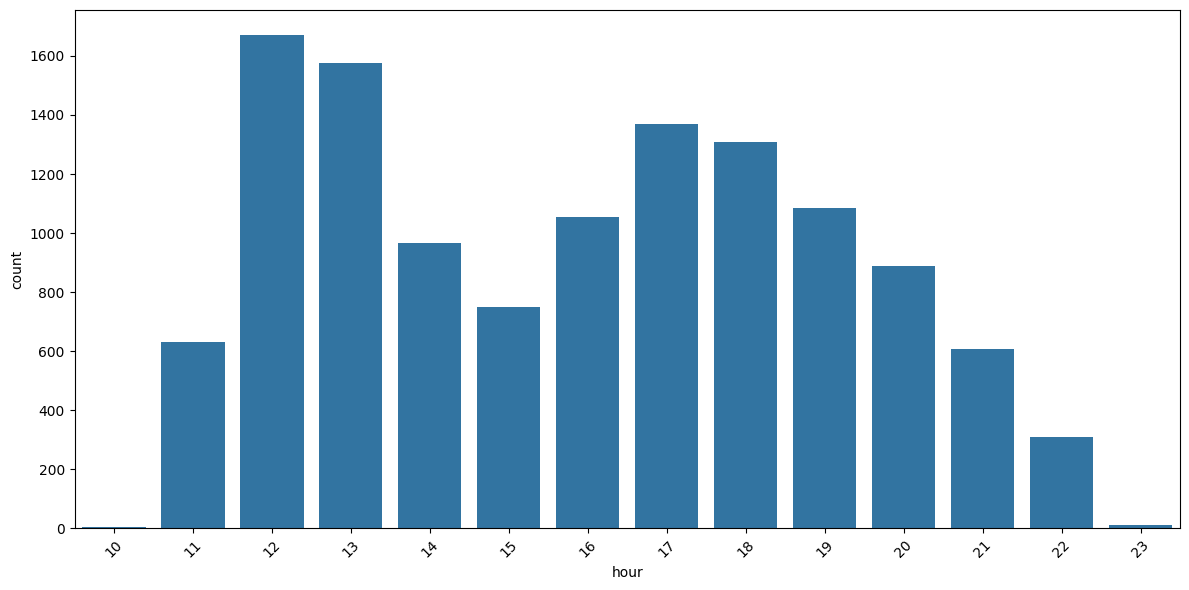

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='hour')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
merged_df['time_seconds'] = merged_df['order_time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
merged_df['time_bucket'] =merged_df['time_seconds'].apply(
    lambda x: '0:00-1:00' if x <= 1 * 3600 else
            '1:00-2:00' if 1 * 3600 < x <= 2 * 3600 else
            '2:00-3:00' if 2 * 3600 < x <= 3 * 3600 else
            '3:00-4:00' if 3 * 3600 < x <= 4 * 3600 else
            '4:00-5:00' if 4 * 3600 < x <= 5 * 3600 else
            '5:00-6:00' if 5 * 3600 < x <= 6 * 3600 else
            '6:00-7:00' if 6 * 3600 < x <= 7 * 3600 else
            '7:00-8:00' if 7 * 3600 < x <= 8 * 3600 else
            '8:00-9:00' if 8 * 3600 < x <= 9 * 3600 else
            '9:00-10:00' if 9 * 3600 < x <= 10 * 3600 else
            '10:00-11:00' if 10 * 3600 < x <= 11 * 3600 else
            '11:00-12:00' if 11 * 3600 < x <= 12 * 3600 else
            '12:00-13:00' if 12 * 3600 < x <= 13 * 3600 else
            '13:00-14:00' if 13 * 3600 < x <= 14 * 3600 else
            '14:00-15:00' if 14 * 3600 < x <= 15 * 3600 else
            '15:00-16:00' if 15 * 3600 < x <= 16 * 3600 else
            '16:00-17:00' if 16 * 3600 < x <= 17 * 3600 else
            '17:00-18:00' if 17 * 3600 < x <= 18 * 3600 else
            '18:00-19:00' if 18 * 3600 < x <= 19 * 3600 else
            '19:00-20:00' if 19 * 3600 < x <= 20 * 3600 else
            '20:00-21:00' if 20 * 3600 < x <= 21 * 3600 else
            '21:00-22:00' if 21 * 3600 < x <= 22 * 3600 else
            '22:00-23:00' if 22 * 3600 < x <= 23 * 3600 else
            '23:00-24:00'
)

In [19]:
merged_df['meal_bucket'] =merged_df['time_seconds'].apply(
    lambda x: 'Breakfast' if 6 * 3600 <= x < 11 * 3600 else
              'Lunch' if 11 * 3600 <= x < 16 * 3600 else
              'Evening' if 16 * 3600 <= x < 20 * 3600 else
              'Night'
)
merged_df['meal_bucket'].value_counts()

,count
meal_bucket,
Lunch,5596
Evening,4816
Night,1817
Breakfast,5


In [20]:
merged_df[merged_df['meal_bucket']== 'Night'].head(3)

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,order_datetime,order_per_minute,order_per_hour,weekday,hour,minutes,time_seconds,time_bucket,meal_bucket
142,143,60,2023-01-01,20:05:16,104.0,Veggie Burger,American,10.50,2023-01-01 20:05:16,2023-01-01 20:05:00,2023-01-01 20:00:00,Sunday,20,5,72316,20:00-21:00,Night
143,144,60,2023-01-01,20:05:16,125.0,Spaghetti & Meatballs,Italian,17.95,2023-01-01 20:05:16,2023-01-01 20:05:00,2023-01-01 20:00:00,Sunday,20,5,72316,20:00-21:00,Night
144,145,61,2023-01-01,20:08:43,101.0,Hamburger,American,12.95,2023-01-01 20:08:43,2023-01-01 20:08:00,2023-01-01 20:00:00,Sunday,20,8,72523,20:00-21:00,Night


/tmp/ipython-input-21-1084491681.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipython-input-21-1084491681.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipython-input-21-1084491681.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipython-input-21-1084491681.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


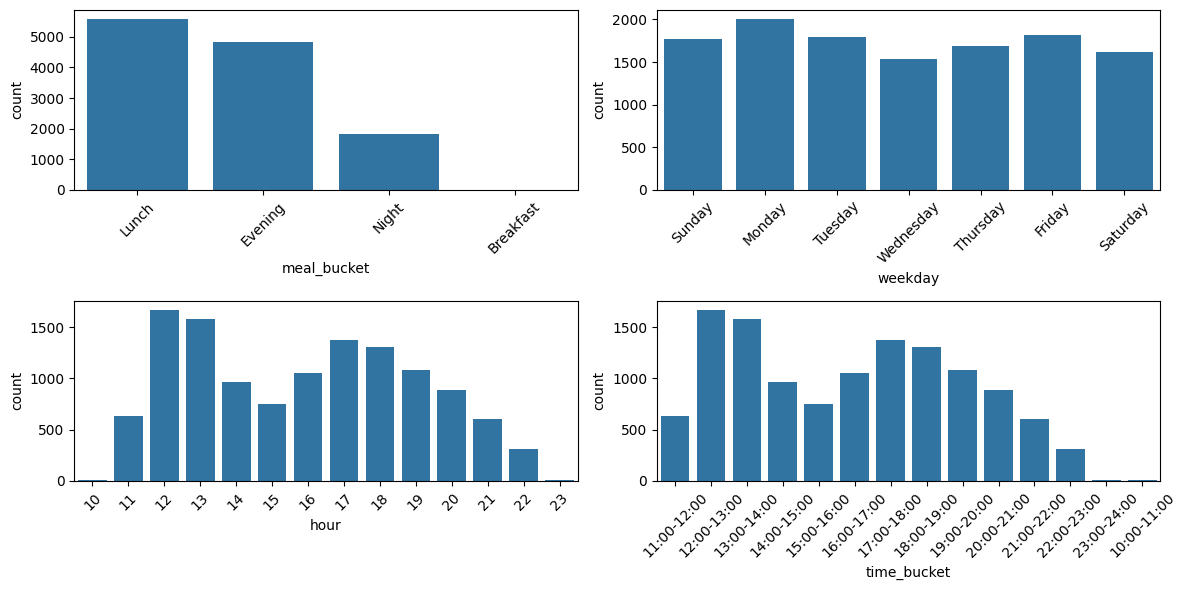

In [21]:
fig,axes = plt.subplots(2,2, figsize=(12,6))

sns.countplot(data=merged_df, x='meal_bucket', ax=axes[0][0])
sns.countplot(data=merged_df, x='weekday', ax=axes[0][1])
sns.countplot(data=merged_df, x='hour', ax=axes[1][0])
sns.countplot(data= merged_df, x = 'time_bucket', ax= axes[1][1])
# Rotate x-axis labels on each subplot
for row_axes in axes:
  for ax in row_axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

In [22]:
merged_df['quantity'] = 1
merged_df['quantity'] = merged_df['quantity'].astype(int)
merged_df.head()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,order_datetime,order_per_minute,order_per_hour,weekday,hour,minutes,time_seconds,time_bucket,meal_bucket,quantity
0,1,1,2023-01-01,11:38:36,109.0,Korean Beef Bowl,Asian,17.95,2023-01-01 11:38:36,2023-01-01 11:38:00,2023-01-01 11:00:00,Sunday,11,38,41916,11:00-12:00,Lunch,1
1,2,2,2023-01-01,11:57:40,108.0,Tofu Pad Thai,Asian,14.50,2023-01-01 11:57:40,2023-01-01 11:57:00,2023-01-01 11:00:00,Sunday,11,57,43060,11:00-12:00,Lunch,1
2,3,2,2023-01-01,11:57:40,124.0,Spaghetti,Italian,14.50,2023-01-01 11:57:40,2023-01-01 11:57:00,2023-01-01 11:00:00,Sunday,11,57,43060,11:00-12:00,Lunch,1
3,4,2,2023-01-01,11:57:40,117.0,Chicken Burrito,Mexican,12.95,2023-01-01 11:57:40,2023-01-01 11:57:00,2023-01-01 11:00:00,Sunday,11,57,43060,11:00-12:00,Lunch,1
4,5,2,2023-01-01,11:57:40,129.0,Mushroom Ravioli,Italian,15.50,2023-01-01 11:57:40,2023-01-01 11:57:00,2023-01-01 11:00:00,Sunday,11,57,43060,11:00-12:00,Lunch,1


In [23]:
orders_count_hourly = merged_df.groupby(['weekday', 'order_per_hour']).agg(order_quantity=('order_id', 'count')).reset_index()
orders_count_minutely = merged_df.groupby(['weekday', 'order_per_minute']).agg(order_quantity=('order_id', 'count')).reset_index()

In [24]:
orders_count_hourly

,weekday,order_per_hour,order_quantity
0,Friday,2023-01-06 11:00:00,5
1,Friday,2023-01-06 12:00:00,28
2,Friday,2023-01-06 13:00:00,29
3,Friday,2023-01-06 14:00:00,10
4,Friday,2023-01-06 15:00:00,13
...,...,...,...
1042,Wednesday,2023-03-29 17:00:00,10
1043,Wednesday,2023-03-29 18:00:00,10
1044,Wednesday,2023-03-29 19:00:00,14
1045,Wednesday,2023-03-29 20:00:00,6


In [25]:
orders_count_minutely

,weekday,order_per_minute,order_quantity
0,Friday,2023-01-06 11:39:00,2
1,Friday,2023-01-06 11:40:00,2
2,Friday,2023-01-06 11:57:00,1
3,Friday,2023-01-06 12:05:00,4
4,Friday,2023-01-06 12:09:00,1
...,...,...,...
5126,Wednesday,2023-03-29 19:56:00,1
5127,Wednesday,2023-03-29 20:03:00,2
5128,Wednesday,2023-03-29 20:26:00,3
5129,Wednesday,2023-03-29 20:29:00,1


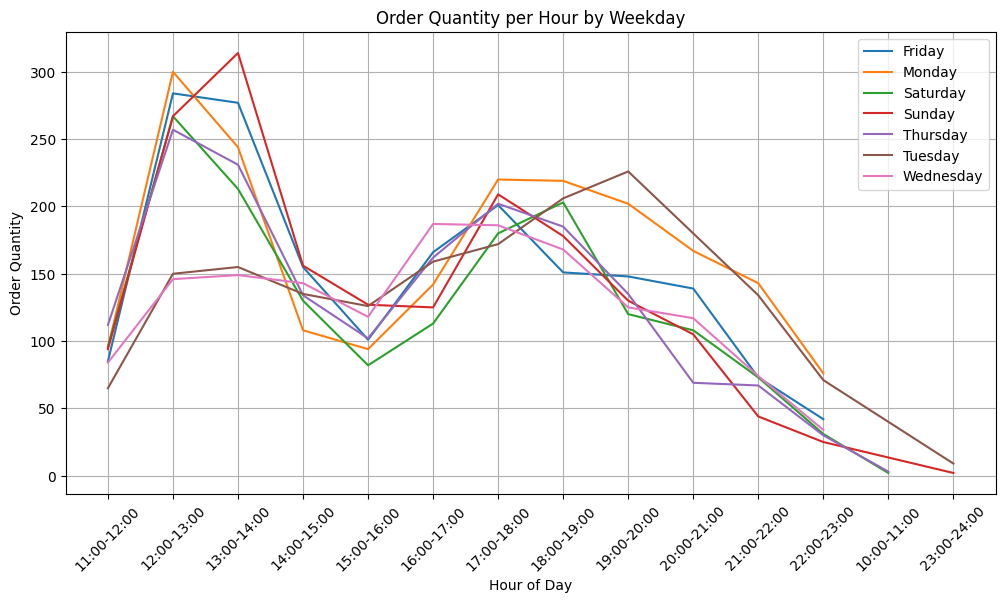

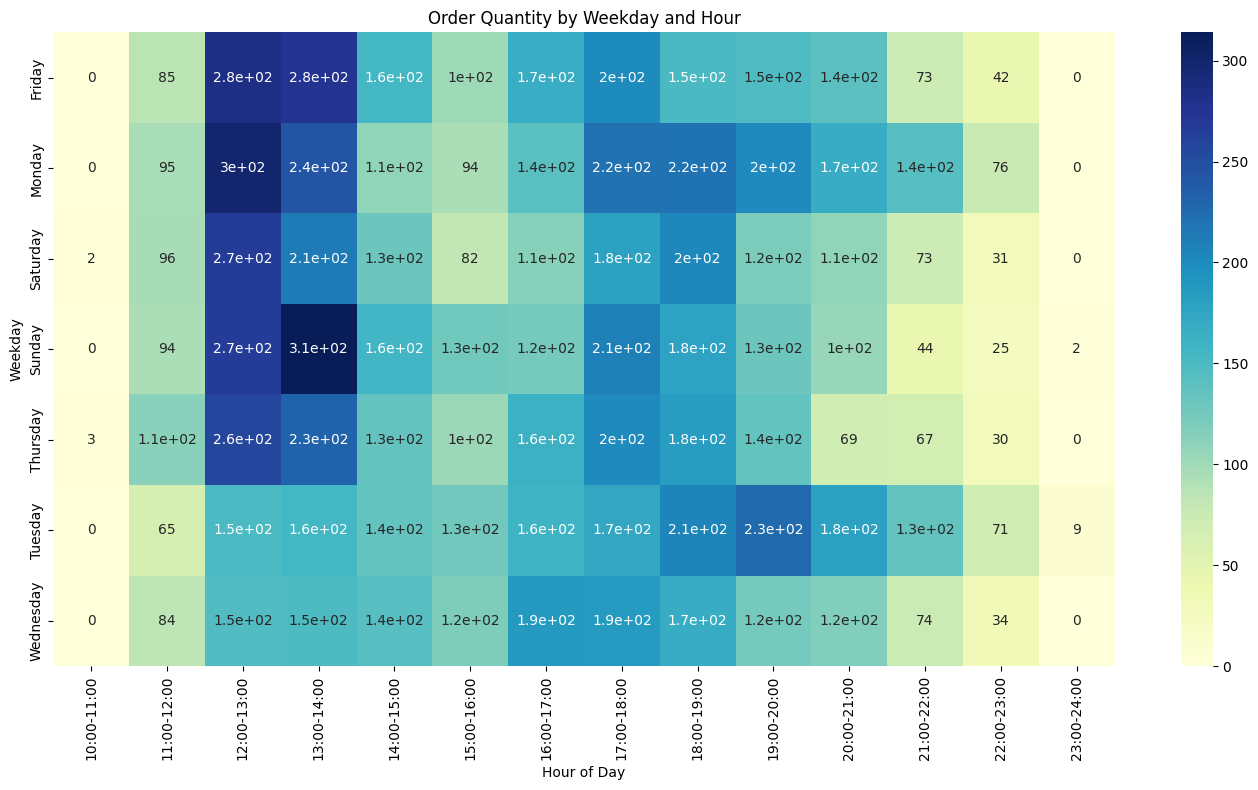

In [26]:
pivot_df = merged_df.groupby(['weekday', 'time_bucket']).agg(order_quantity=('order_id', 'count')).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_df, x='time_bucket', y='order_quantity', hue='weekday')
plt.xticks(rotation=45)
plt.grid(True)
plt.title("Order Quantity per Hour by Weekday")
plt.xlabel("Hour of Day")
plt.ylabel("Order Quantity")
plt.legend()

heatmap_data = pivot_df.pivot_table(
    index='weekday',
    columns='time_bucket',
    values='order_quantity',
    fill_value=0
)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True)
plt.title("Order Quantity by Weekday and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Weekday")

plt.tight_layout()
plt.show()


In [27]:
print(merged_df['category'].value_counts())

category
Asian       3470
Italian     2948
Mexican     2945
American    2734
Name: count, dtype: int64


In [28]:
item_counts = merged_df.groupby(['item_name', 'order_datetime']).agg(item_quantity=('item_name', 'count')).sort_values(by='order_datetime', ascending=False).reset_index()
item_counts

,item_name,order_datetime,item_quantity
0,Chips & Salsa,2023-03-31 22:15:48,1
1,Steak Torta,2023-03-31 22:05:04,1
2,Mushroom Ravioli,2023-03-31 22:05:04,1
3,Korean Beef Bowl,2023-03-31 22:05:04,1
4,Chips & Salsa,2023-03-31 22:05:04,1
...,...,...,...
11785,French Fries,2023-01-01 11:57:40,1
11786,Chicken Burrito,2023-01-01 11:57:40,1
11787,Spaghetti,2023-01-01 11:57:40,1
11788,Mushroom Ravioli,2023-01-01 11:57:40,1


/tmp/ipython-input-29-3407384665.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


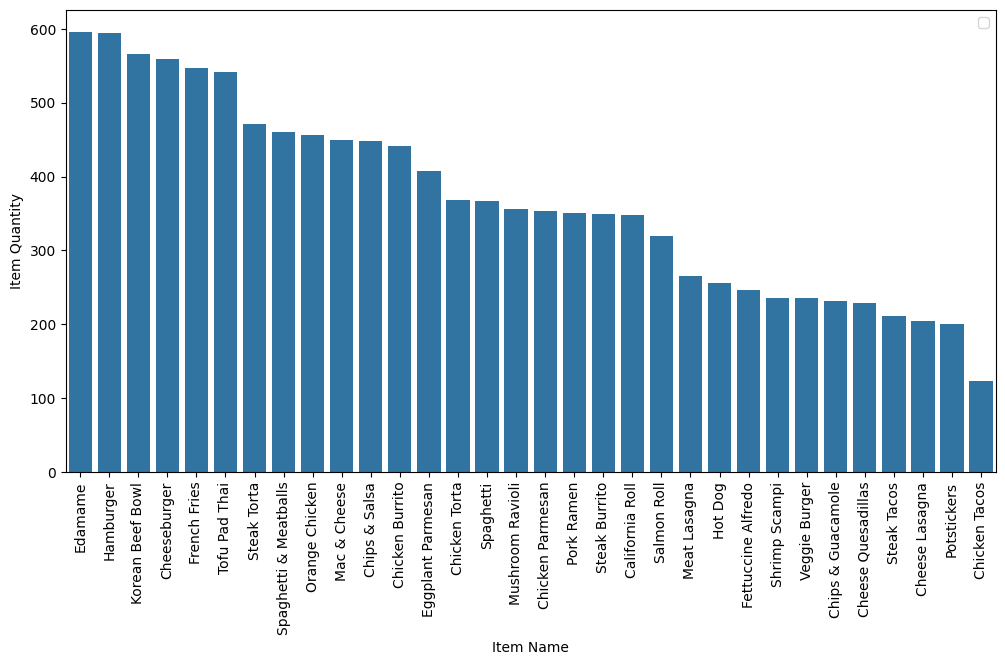

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data=item_counts, x='item_name', order=item_counts['item_name'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Item Name')
plt.ylabel('Item Quantity')
plt.legend()
plt.show()

/tmp/ipython-input-30-3415031676.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = merged_df.groupby(['item_name', 'weekday']).agg(item_quantity=('item_name', 'count')).reset_index()
/tmp/ipython-input-30-3415031676.py:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = temp.pivot_table(


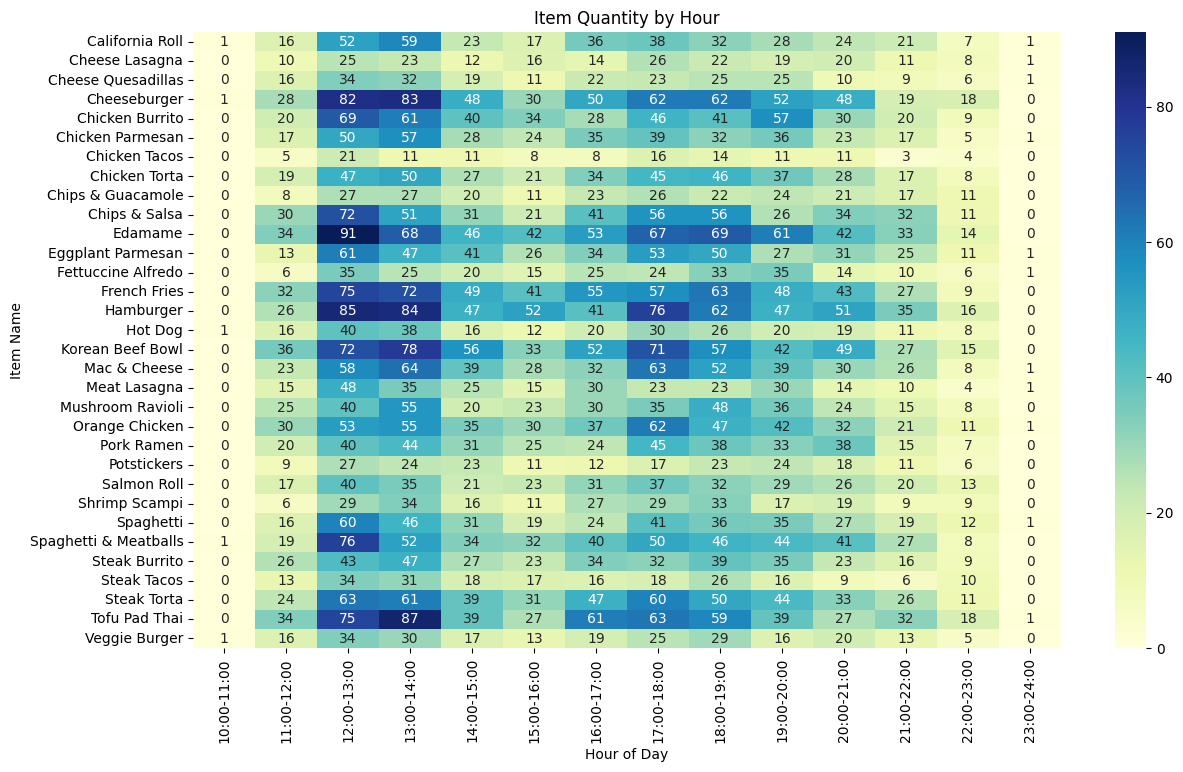

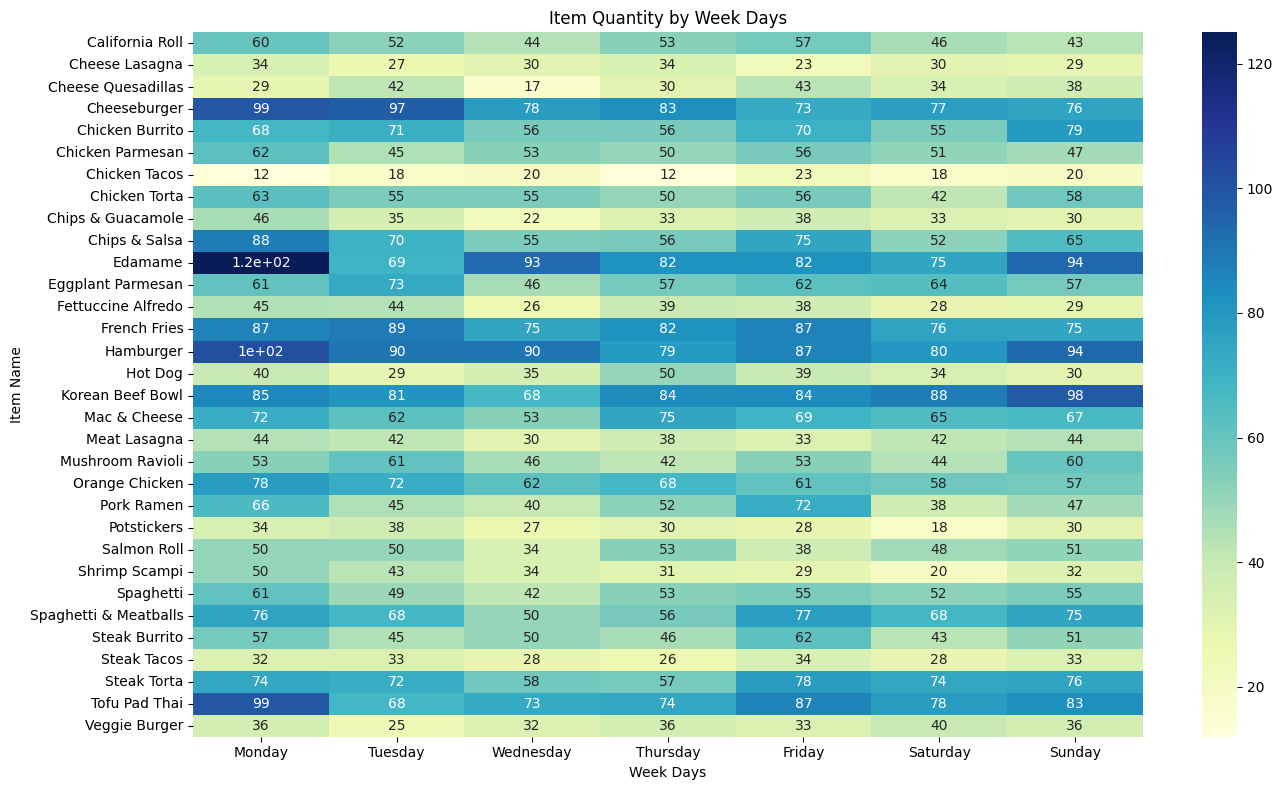

In [30]:
temp = merged_df.groupby(['item_name', 'time_bucket']).agg(item_quantity=('item_name', 'count')).reset_index()

# Pivot the data for heatmap (rows=weekday, columns=hour)
heatmap_data = temp.pivot_table(
    index='item_name',
    columns='time_bucket',
    values='item_quantity',
    fill_value=0
)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True)
plt.title("Item Quantity by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Item Name")


# Define the desired order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'weekday' column to a categorical type with the specified order
merged_df['weekday'] = pd.Categorical(merged_df['weekday'], categories=weekday_order, ordered=True)

temp = merged_df.groupby(['item_name', 'weekday']).agg(item_quantity=('item_name', 'count')).reset_index()

# Pivot the data for heatmap (rows=weekday, columns=hour)
heatmap_data = temp.pivot_table(
    index='item_name',
    columns='weekday',
    values='item_quantity',
    fill_value=0
)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True)
plt.title("Item Quantity by Week Days")
plt.xlabel("Week Days")
plt.ylabel("Item Name")

plt.tight_layout()
plt.show()

In [31]:
merged_df.head()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,order_datetime,order_per_minute,order_per_hour,weekday,hour,minutes,time_seconds,time_bucket,meal_bucket,quantity
0,1,1,2023-01-01,11:38:36,109.0,Korean Beef Bowl,Asian,17.95,2023-01-01 11:38:36,2023-01-01 11:38:00,2023-01-01 11:00:00,Sunday,11,38,41916,11:00-12:00,Lunch,1
1,2,2,2023-01-01,11:57:40,108.0,Tofu Pad Thai,Asian,14.50,2023-01-01 11:57:40,2023-01-01 11:57:00,2023-01-01 11:00:00,Sunday,11,57,43060,11:00-12:00,Lunch,1
2,3,2,2023-01-01,11:57:40,124.0,Spaghetti,Italian,14.50,2023-01-01 11:57:40,2023-01-01 11:57:00,2023-01-01 11:00:00,Sunday,11,57,43060,11:00-12:00,Lunch,1
3,4,2,2023-01-01,11:57:40,117.0,Chicken Burrito,Mexican,12.95,2023-01-01 11:57:40,2023-01-01 11:57:00,2023-01-01 11:00:00,Sunday,11,57,43060,11:00-12:00,Lunch,1
4,5,2,2023-01-01,11:57:40,129.0,Mushroom Ravioli,Italian,15.50,2023-01-01 11:57:40,2023-01-01 11:57:00,2023-01-01 11:00:00,Sunday,11,57,43060,11:00-12:00,Lunch,1


In [32]:
orders_agg = merged_df.groupby(['weekday', 'hour']).agg(order_quantity=('order_id', 'count')).reset_index()

/tmp/ipython-input-32-2902549654.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_agg = merged_df.groupby(['weekday', 'hour']).agg(order_quantity=('order_id', 'count')).reset_index()


In [33]:
orders_agg.head()

,weekday,hour,order_quantity
0,Monday,10,0
1,Monday,11,95
2,Monday,12,300
3,Monday,13,244
4,Monday,14,108


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
orders_aggregated = orders_agg.copy()

In [36]:
# Define features (X) and target (y)

X = orders_aggregated.drop(['order_quantity'], axis=1)
y = orders_aggregated[['order_quantity']]

In [37]:
y[y['order_quantity'] > 1]


,order_quantity
1,95
2,300
3,244
4,108
5,94
...,...
93,130
94,105
95,44
96,25


In [38]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
y_train

,order_quantity
49,202
70,2
68,42
15,65
39,74
...,...
60,155
71,96
14,0
92,178


In [40]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [41]:
categorical_cols = ['weekday', 'hour']

# Creating the encoder
enc = OneHotEncoder(handle_unknown='ignore')

# Fitting the encoder to the data
enc.fit(X_train[categorical_cols])

# Transforming new data
X_train_enc_sparse = enc.transform(X_train[categorical_cols])
X_test_enc_sparse = enc.transform(X_test[categorical_cols])

In [42]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_enc_sparse, y_train)

# Make predictions
y_pred = model.predict(X_test_enc_sparse)

In [43]:
# Truncate negative predictions to 0
y_pred_truncated = np.maximum(0, y_pred)

In [44]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_truncated)
r2 = r2_score(y_test, y_pred_truncated)

# Output results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Coefficients: [[   6.57030018   19.99649453   -7.77107002    4.77545216   -8.89846583
    -2.10137678  -12.57133425 -123.9459716   -36.56563896  107.78463247
   113.16584239   22.01338855  -16.49950164   28.30361333   69.14865955
    64.328247     28.4343689     1.78875298  -38.69425295  -93.23464014
  -126.02749988]]
Intercept: [126.56562446]
Mean Squared Error: 979.905658209738
R-squared: 0.7979670730476585


In [45]:
sample_input_data = {'weekday': ['Tuesday'], 'hour': [6]} # Example: Tuesday, 6 AM (6 hour)

# Create a DataFrame from the sample input data
sample_input_df = pd.DataFrame(sample_input_data)

# Select only the categorical columns used for encoding
sample_input_categorical = sample_input_df[categorical_cols]

# Transform the sample input using the fitted encoder
# The output is a sparse matrix
sample_input_encoded_sparse = enc.transform(sample_input_categorical)

# Make the prediction using the model and the sparse encoded sample input
prediction = model.predict(sample_input_encoded_sparse)

# Output the prediction
# Prediction is a float, cast to int if whole numbers are expected for order quantity.
print(f"Predicted order quantity: {int(prediction[0])}")

Predicted order quantity: 124


/tmp/ipython-input-45-1294961477.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted order quantity: {int(prediction[0])}")


In [46]:
# !pip install statsmodels

In [47]:
from sklearn.linear_model import PoissonRegressor

In [48]:
# Poisson Regression is a type of Generalized Linear Model (GLM)
model = PoissonRegressor()
model.fit(X_train_enc_sparse, y_train)
y_pred = np.round(model.predict(X_test_enc_sparse))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coefficients: [ 0.04351589  0.14262324 -0.04820531  0.03214659 -0.05829424 -0.01333806
 -0.0984588  -1.46929328 -0.12218577  0.77275628  0.77938779  0.3306741
  0.06355944  0.36694509  0.60461604  0.56742244  0.37880385  0.19065135
 -0.13523542 -0.77500117 -1.55311146]
Intercept: 4.6341935500227365
Mean Squared Error: 802.35
R-squared: 0.8345747699463582


In [49]:
sample_input_data = {'weekday': ['Tuesday'], 'hour': [6]} # Example: Tuesday, 6:00 AM (6 hour)

# Create a DataFrame from the sample input data
sample_input_df = pd.DataFrame(sample_input_data)

# Make the prediction using the model and the sparse encoded sample input
sample_input_encoded_sparse = enc.transform(sample_input_df[['weekday', 'hour']]) # Ensure only encoded features are transformed
prediction = model.predict(sample_input_encoded_sparse)

# Get the hour from the sample input data
input_hour = sample_input_df['hour'].iloc[0] # Get the hour value from the first row

# Post-process the prediction based on closed hours (0 to 8)
predicted_quantity_raw = prediction[0]

# Apply the rule: if the hour is between 0:00 and 9:00 (inclusive), the quantity is 0.
if (0 <= input_hour <= 9) or (input_hour == 24):
    predicted_quantity = 0
else:
    # Apply truncation if using Linear Regression and still want to avoid negative values
    # Or round/cast to int if using PoissonRegressor
    if isinstance(model, LinearRegression):
         predicted_quantity = int(np.maximum(0, predicted_quantity_raw))
    elif isinstance(model, PoissonRegressor):
         predicted_quantity = int(np.round(predicted_quantity_raw))
    else:
         # Default to rounding and casting if using another model type
         predicted_quantity = int(np.round(predicted_quantity_raw))

# Output the prediction
print(f"Predicted order quantity for hour {input_hour}: {predicted_quantity}")

Predicted order quantity for hour 6: 0


In [50]:
sample_input_data = {'weekday': ['Tuesday'], 'hour': [20]} # Example: Tuesday, 8:00 PM (20 hour)

# Create a DataFrame from the sample input data
sample_input_df = pd.DataFrame(sample_input_data)

# Make the prediction using the model and the sparse encoded sample input
sample_input_encoded_sparse = enc.transform(sample_input_df[['weekday', 'hour']]) # Ensure only encoded features are transformed
prediction = model.predict(sample_input_encoded_sparse)

# Get the hour from the sample input data
input_hour = sample_input_df['hour'].iloc[0] # Get the hour value from the first row

# Post-process the prediction based on closed hours (0 to 8)
predicted_quantity_raw = prediction[0]

# Apply the rule: if the hour is between 0:00 and 9:00 (inclusive), the quantity is 0.
if (0 <= input_hour <= 9) or (input_hour == 24):
    predicted_quantity = 0
else:
    # Apply truncation if using Linear Regression and still want to avoid negative values
    # Or round/cast to int if using PoissonRegressor
    if isinstance(model, LinearRegression):
         predicted_quantity = int(np.maximum(0, predicted_quantity_raw))
    elif isinstance(model, PoissonRegressor):
         predicted_quantity = int(np.round(predicted_quantity_raw))
    else:
         # Default to rounding and casting if using another model type
         predicted_quantity = int(np.round(predicted_quantity_raw))

# Output the prediction
print(f"Predicted order quantity for hour {input_hour}: {predicted_quantity}")

Predicted order quantity for hour 20: 123
